In [6]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from functools import partial
import matplotlib.pyplot as plt

In [6]:
print(tf.config.list_physical_devices("GPU"))

[]


In [8]:
(X, y), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

X_train, X_valid, y_train, y_valid = train_test_split(X,y, random_state=42, test_size=.2)

In [10]:
DefaultConv2D = partial(tf.keras.layers.Conv2D, kernel_size=3, padding="same", activation="relu", kernel_initializer="he_normal")


model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28,28,1)),
    tf.keras.layers.Rescaling(scale=1./255),
    DefaultConv2D(filters=64, kernel_size=7),
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation="relu",
    kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=64, activation="relu",
    kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy",
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])


In [16]:
es_cb = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True,
    verbose=1,
    min_delta=1e-4
)

history = model.fit(
    X_train, y_train,
    epochs=10,
    validation_data=(X_valid, y_valid),
    callbacks=[es_cb]
)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 33s 22ms/step - accuracy: 0.9292 - loss: 0.2051 - val_accuracy: 0.9148 - val_loss: 0.2505
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 33s 22ms/step - accuracy: 0.9355 - loss: 0.1915 - val_accuracy: 0.9157 - val_loss: 0.2550
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 33s 22ms/step - accuracy: 0.9374 - loss: 0.1835 - val_accuracy: 0.9115 - val_loss: 0.2742
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 33s 22ms/step - accuracy: 0.9401 - loss: 0.1783 - val_accuracy: 0.9165 - val_loss: 0.2641
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 33s 22ms/step - accuracy: 0.9417 - loss: 0.1680 - val_accuracy: 0.9110 - val_loss: 0.2748
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 33s 22ms/step - accuracy: 0.9439 - loss: 0.1612 - val_accuracy: 0.9168 - val_loss: 0.2581
Epoch 6: early stopping
Restoring model weights from the end of the best epoch: 1.


In [14]:
model.save("CNN_Best_So_Far.keras")

In [13]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9091 - loss: 0.2719


[0.2718539834022522, 0.9090999960899353]

In [3]:
model = tf.keras.models.load_model("CNN_Best_So_Far.keras")

375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step


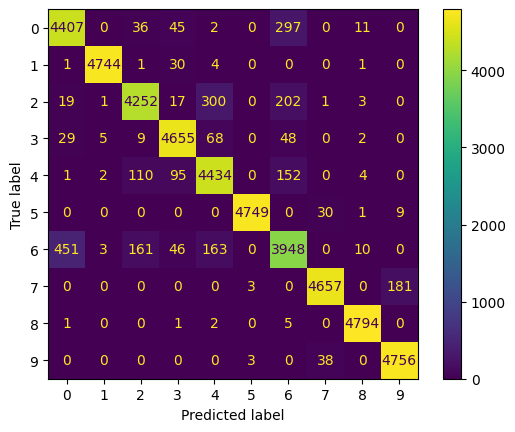

In [9]:
y_prediction_proba = model.predict(X_valid)
y_prediction = y_prediction_proba.argmax(axis=1)
predictions_proba = model.predict(X_train)
predictions = predictions_proba.argmax(axis=1)
ConfusionMatrixDisplay.from_predictions(y_train, predictions)
plt.show()